This is an example of how to solve the CartPole gym environment through pure random search.
This example is a slight addaptation of [Simple reinforcement learning methods to learn CartPole](http://kvfrans.com/simple-algoritms-for-solving-cartpole/)

### imports

In [1]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

## Policy

The policy is simply a linear function of the observation 

$$ a = <W,o>$$


In [2]:
class Policy:

    def __init__(self):
        self.parameters = None
        self.reset_parameters()

    def get_action(self, observation):
        return 0 if np.matmul(self.parameters, observation) < 0 else 1

    def set_parameters(self, parameters):
        self.parameters = np.copy(parameters)

    def get_parameters(self):
        return np.copy(self.parameters)

    def reset_parameters(self):
        self.parameters = np.random.rand(4) * 2 -1

## Sample generation

In [3]:
def run_episode(env, policy, is_gui=False):
    observation = env.reset()
    totalreward = 0
    for k in xrange(200):
        if is_gui:
            env.render()
        action = policy.get_action(observation)
        observation, reward, done, info = env.step(action)
        totalreward += reward
        if is_gui:
            time.sleep(0.05)
        if done:
            break
    return totalreward

## Find best parameters by random search

In [4]:
    env = gym.make('CartPole-v0')
    policy = Policy()
    bestparams = None
    bestreward = 0
    for _ in xrange(10000):
        policy.reset_parameters()
        reward = run_episode(env, policy)
        if reward > bestreward:
            bestreward = reward
            bestparams = policy.get_parameters()
            # considered solved if the agent lasts 200 timesteps
            if reward == 200:
                print('found best {}'.format(bestreward))
                break

    policy.set_parameters(bestparams)
    reward = run_episode(env, policy, True)

found best 200.0


## Generate statistics 

In [9]:
env = gym.make('CartPole-v0')
policy = Policy()
episodes_until_optimal = []

for k in xrange(1000):
    
    bestparams = None
    bestreward = 0
    
    if k % 100 == 0:
        print(k)
    
    for t in xrange(10000):
        policy.reset_parameters()
        reward = run_episode(env, policy)
        if reward > bestreward:
            bestreward = reward
            bestparams = policy.get_parameters()
            # considered solved if the agent lasts 200 timesteps
            if reward == 200:
                episodes_until_optimal.append(t)
                break    
print('finished')

0
100
200
300
400
500
600
700
800
900
finished


### plot statistics 

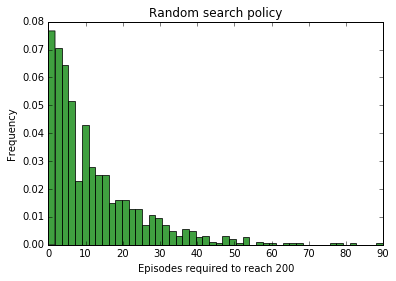

In [17]:
Y = np.vstack(episodes_until_optimal)

plt.figure()
n, bins, patches = plt.hist(Y,  50, normed=1, facecolor='green', alpha=0.75)
plt.xlabel('Episodes required to reach 200')
plt.ylabel('Frequency')
plt.title('Random search policy')
plt.show()
